In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm, LinearSegmentedColormap

sys.path.append("..")

In [2]:
from manage_data import (get_conditions, load_result, delete_all, delete_result,
                         get_drag_by_velocity, get_std_by_velocity, get_log_scale)
from plot import get_colormap

In [3]:
# delete_all()

In [4]:
particle = 1000
ensemble = 1000

df = load_result(conditions=get_conditions(
    N_particle = particle,
    N_ensemble = ensemble,
    velocity = None,
    slope = 0.4,
    Lambda = 0.3,
    boundary = 5.0,
    N_bins = None,
    gamma = 1.0,
    temperature = 1.0,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.001,
    initial = None,
    sampling = None,
    )
)

# df = df[(df["velocity"] >= 0.01) & (df["velocity"] <= 0.1)]
df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,drag,std,time,interval
11173,f720fd,1000,1000,0.001000,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,3.210,2.471676,3783.567053,1000.0
10701,279944,1000,1000,0.001259,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,4.820,2.366183,3979.771690,1000.0
3335,40a204,1000,1000,0.001585,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,-1.399,2.401252,4516.062760,1000.0
13413,4038be,1000,1000,0.001995,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,1.378,2.440036,4516.062955,1000.0
7706,a0273c,1000,1000,0.002512,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,1.629,2.451871,3821.030020,1000.0
11102,b590ca,1000,1000,0.003162,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,0.151,2.405337,3832.535240,1000.0
2079,d4fb19,1000,1000,0.003981,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,2.796,2.529471,3827.372324,1000.0
8206,00f2cd,1000,1000,0.005012,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,-2.005,2.406067,3827.297758,1000.0
3303,6fe4f3,1000,1000,0.006310,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,0.211,2.397449,4156.091249,1000.0
5982,82b5be,1000,1000,0.007943,0.3,5.0,40,1.0,0.4,1.0,1.0,1.0,0.001,10000,100,-3.646,2.342846,4156.078286,1000.0


In [5]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['f720fd', '279944', '40a204', '4038be', 'a0273c', 'b590ca', 'd4fb19', '00f2cd', '6fe4f3', '82b5be', 'ee67cb', 'e10f5b', 'd53019', 'c94a03', '271b4a', 'cafcbb', '05b346', 'e7555b', 'b9774f', '13c701', 'cc8e2b', '3baab2', 'd31e01', '268d7a', '683c87', 'f1982b', 'f11ce8', 'ffc8e0', '46517f', '60562f', '7ff238', 'fd9cbe', '576435', '40bf8d', 'b71308', '191367', 'acb182', '79a510', 'e685fe', 'eeca11', 'd49b83', '7bcc7b', 'a4fa2a', '4625fb', '932f0d', 'ea1ce4', 'e6390c', '3bd012', 'f7499e', '71fd37', '172f8d']
51


In [6]:
available_slope, available_Lambda, available_velocity = sorted(
    set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy())), sorted(set(df["velocity"].to_numpy()))
print(f"data = {len(available_slope)} x {len(available_Lambda)} x {len(available_velocity)} = {len(available_slope)*len(available_Lambda)*len(available_velocity)}")
print(f"slope = {available_slope}")
print(f"Lambda = {available_Lambda}")

# available_velocity = np.array([0.003, 0.01, 0.03, 0.1, 0.3, 1.0])
print(f"velocity = {available_velocity}")

data = 1 x 1 x 49 = 49
slope = [0.4]
Lambda = [0.3]
velocity = [0.001, 0.001259, 0.001585, 0.001995, 0.002512, 0.003162, 0.003981, 0.005012, 0.00631, 0.007943, 0.01, 0.01259, 0.01585, 0.01995, 0.02, 0.02512, 0.03, 0.03162, 0.03981, 0.04, 0.05, 0.05012, 0.06, 0.0631, 0.07, 0.07943, 0.08, 0.09, 0.1, 0.1259, 0.1585, 0.1995, 0.2512, 0.3162, 0.3981, 0.5012, 0.631, 0.7943, 1.0, 1.259, 1.585, 1.995, 2.512, 3.162, 3.981, 5.012, 6.31, 7.943, 10.0]


In [7]:
drag, std = [], []

for velocity in available_velocity:
    drag.append(get_drag_by_velocity(df, velocity=velocity))
    std.append(get_std_by_velocity(df, velocity=velocity))

drag, std = np.array(drag), np.array(std)
print(drag.shape)

# nrows, ncols = 4, 4

# fig, axs = plt.subplots(nrows, ncols, figsize=(15,12))

# for i in range(nrows):
#     for j in range(ncols):
#         ax = axs[i,j]
#         ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
#         ax.set_xlabel("velocity", fontsize=20)
#         ax.set_ylabel("drag", fontsize=20)
#         ax.plot(available_velocity, drag[:,i,j])
#         ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
#         ax.axhline(0, linestyle="--", color="black")
#         ax.set_xscale("log")
#         # ax.set_xlim([0, 0.01])
#         # ax.set_ylim([None, 1e6])

# fig.tight_layout()
# # plt.savefig(f"fig/drag ptcl={particle} ensemble={ensemble} variable={len(available_Lambda)*len(available_slope)}.jpg")
# plt.show()

(49, 1, 1)


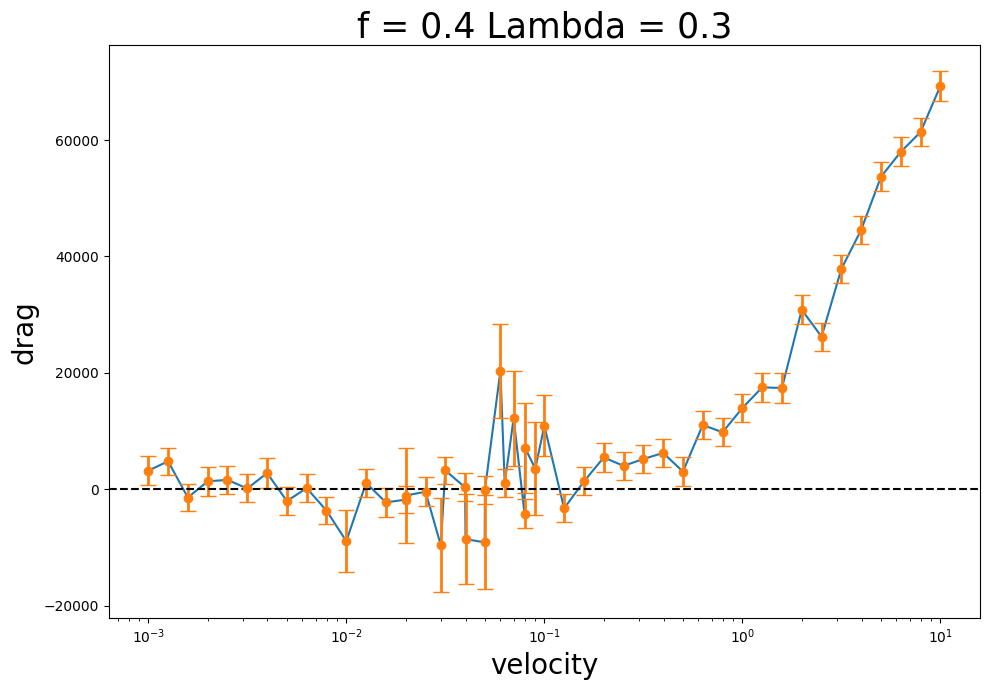

In [11]:
fig, ax = plt.subplots(figsize=(10,7))

i, j = 0, 0

ax.set_title(f"f = {available_slope[i]} Lambda = {available_Lambda[j]}", fontsize=25)
ax.set_xlabel("velocity", fontsize=20)
ax.set_ylabel("drag", fontsize=20)
ax.plot(available_velocity, drag[:,i,j])
ax.errorbar(available_velocity, drag[:,i,j], std[:,i,j], fmt='o', linewidth=2, capsize=6)
ax.axhline(0, linestyle="--", color="black")
ax.set_xscale("log")
# ax.set_xlim([0, 0.01])
# ax.set_ylim([None, 1e6])

fig.tight_layout()
# plt.savefig(f"fig/drag ptcl={particle} ensemble={ensemble} variable={len(available_Lambda)*len(available_slope)}.jpg")
plt.show()

In [9]:
fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]
    
    drag = get_drag_by_velocity(df, velocity=velocity).transpose()
    # print(np.log10(drag.max()), np.log10(-drag.min()))

    c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                    norm=LogNorm(vmin=1, vmax=drag.max()), cmap="binary")
    # c = ax.pcolor(x, y, average, shading="auto",
    #                norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

    # ax.set_xscale("log")
    # ax.set_yscale("log")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")

    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, particle={particle} ensemble={ensemble}")
plt.show()

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7f19e431e160> (for post_execute):


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 1500x1200 with 12 Axes>

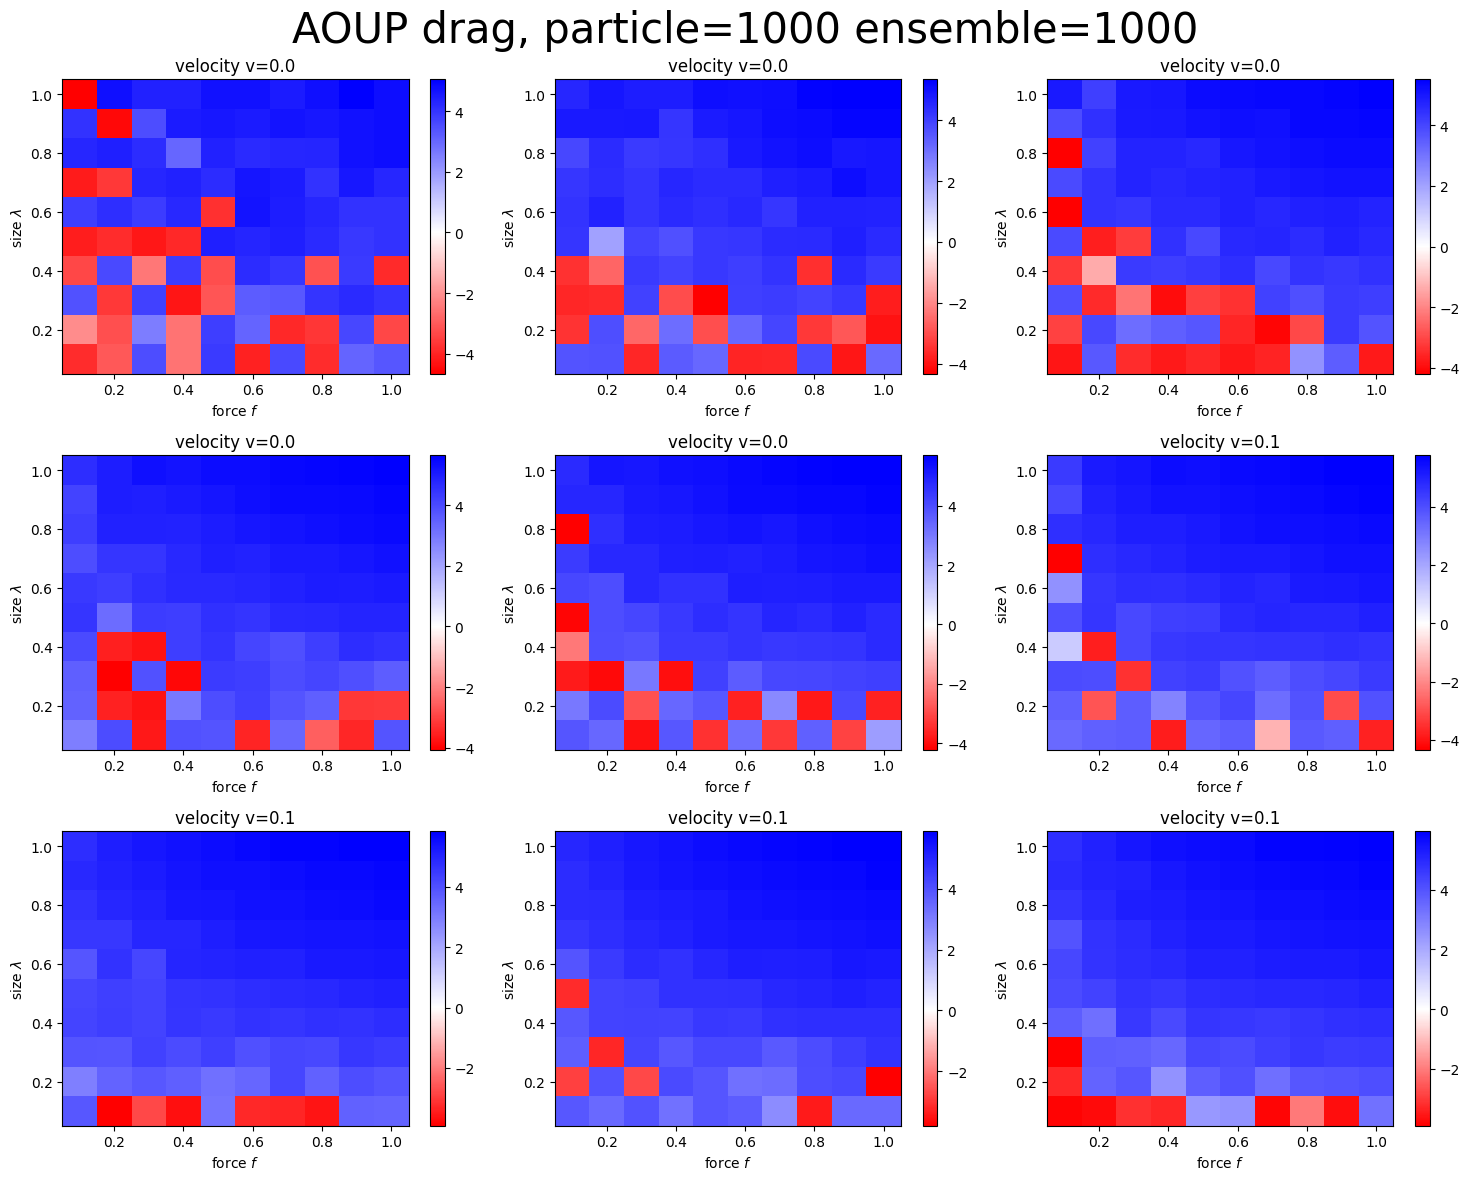

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(15,12))
fig.suptitle(f"AOUP drag, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity = available_velocity[i]

    data = get_log_scale(df, velocity=velocity).transpose()

    cvals  = [min(data.min(), -1), 0, data.max()]
    colors = ["red","white","blue"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

    # c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
    
    # if i == 5: sys.exit()

    ax.set_title(f"velocity v={np.round(velocity, 1)}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    # ax.set_xlim([1.e-1, 1.e0])|
    # ax.set_ylim([1.e-1, 1.e0])
    
    cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/AOUP drag, particle={particle} ensemble={ensemble} velocity 0.1 ~ 0.9.jpg")
plt.show()

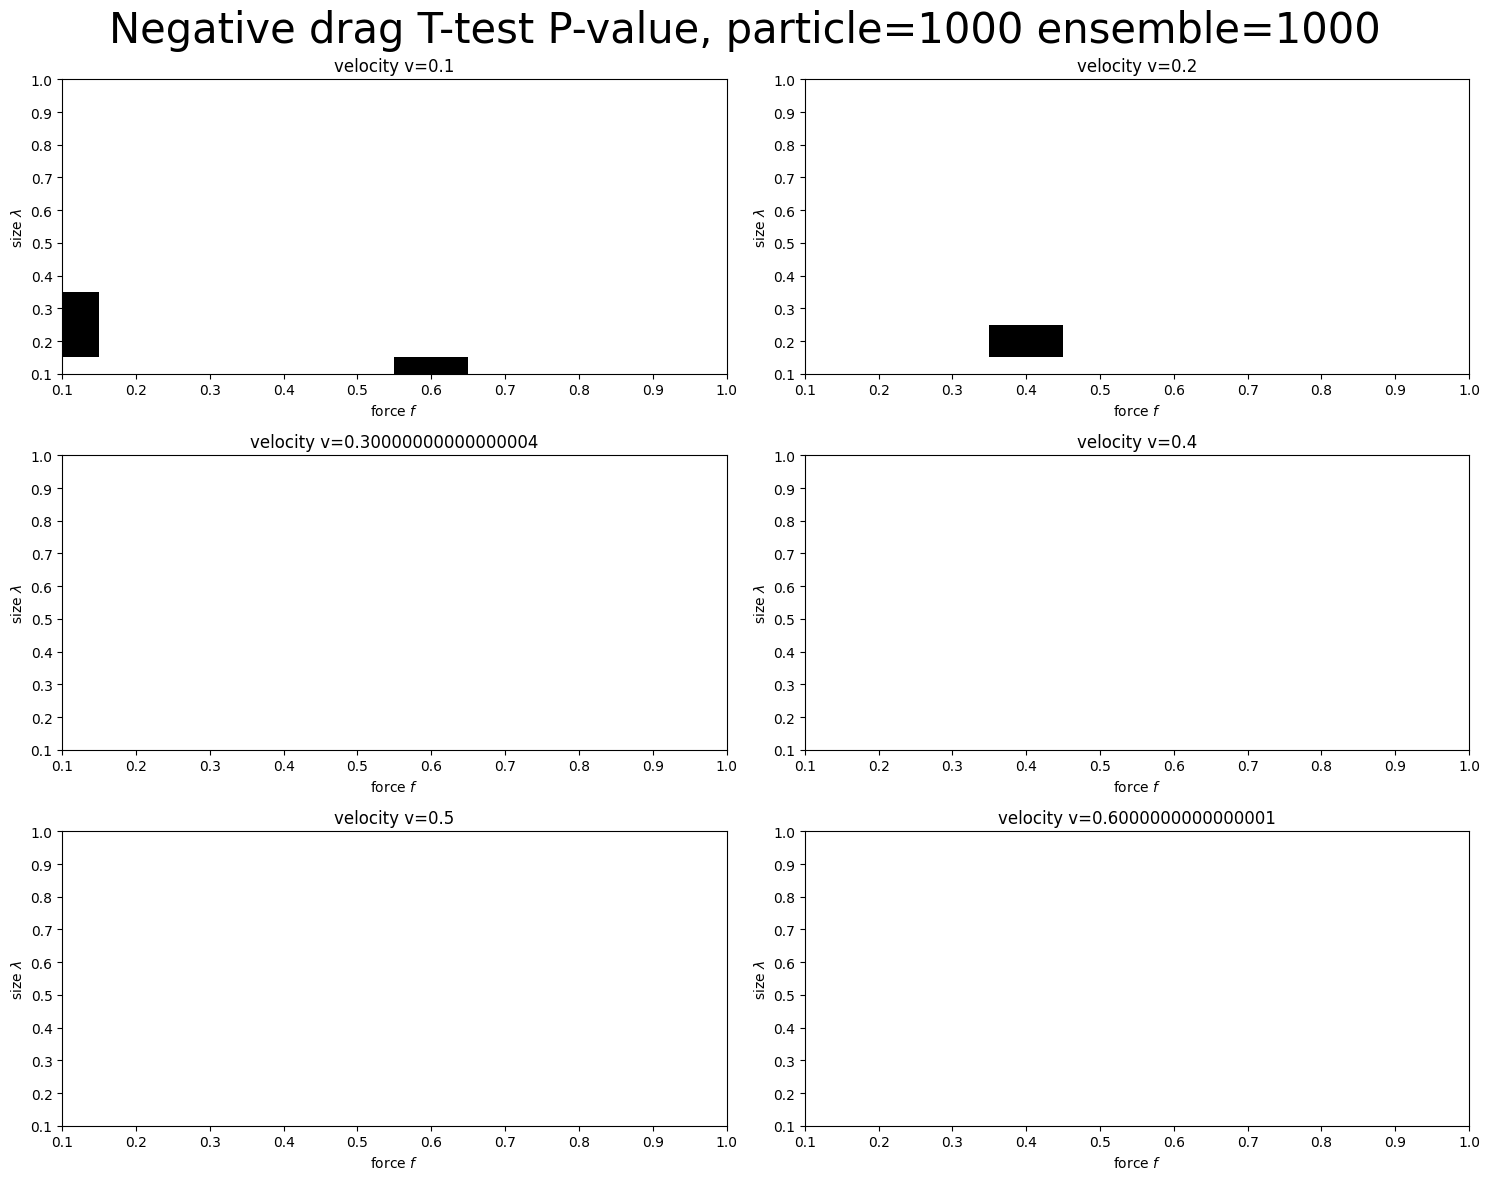

In [33]:
import scipy.stats

fig, axs = plt.subplots(3, 2, figsize=(15,12))
fig.suptitle(f"Negative drag T-test P-value, particle={particle} ensemble={ensemble}", size=30)

for i, ax in enumerate(axs.flat):
    velocity=available_velocity[i]

    drag = get_drag_by_velocity(df, velocity=velocity)
    std = get_std_by_velocity(df, velocity=velocity)

    Z = drag / std
    Z[np.isnan(Z)] = 0.0
    p_value = scipy.stats.norm.cdf(Z)
    # print(p_value.min())
    
    cvals  = [0.15, 0.16]
    colors = ["black","white"]
    cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

    c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
                      cmap=cmap, norm=norm)

    ax.set_title(f"velocity v={velocity}")
    ax.set_xlabel(rf"force $f$")
    ax.set_ylabel(rf"size $\lambda$")
    # ax.set_xscale("log")
    # ax.set_yscale("log")
    ax.set_xlim([1.e-1, 1.e0])
    ax.set_ylim([1.e-1, 1.e0])

    # cbar = plt.colorbar(c)

fig.tight_layout()
# plt.savefig(f"./fig/Negative drag T-Test P-value, particle={particle} ensemble={ensemble}.jpg")
plt.show()

In [ ]:
# from scipy.stats import norm

# fig, axs = plt.subplots(3, 3, figsize=(15,12))
# fig.suptitle(f"Positive drag T-test P-value, ensemble={ensemble}", size=30)

# for i, ax in enumerate(axs.flat):
#     velocity=available_velocity[i]

#     drag = get_drag_by_velocity(df, velocity=velocity)
#     std = get_std_by_velocity(df, velocity=velocity)

#     Z = drag / std
#     Z[np.isnan(Z)] = 0.0

#     p_value = 1 - norm.cdf(Z)
#     # p_value[np.isnan(p_value)] = 1.e-10
#     # print(p_value)
#     # print(p_value.min())

#     # c = ax.contourf(available_slope, available_Lambda, p_value,
#     #             norm=LogNorm(vmin=p_value.min(), vmax=1), cmap="binary_r")
#     c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
#                 norm=LogNorm(vmin=1.e-15, vmax=1.e-2), cmap="binary_r")

#     ax.set_title(f"velocity v={velocity}")
#     ax.set_xlabel(rf"force $f$")
#     ax.set_ylabel(rf"size $\lambda$")
#     ax.set_xscale("log")
#     ax.set_yscale("log")
#     ax.set_xlim([1.e-3, 1.e+1])
#     ax.set_ylim([1.e-3, 1])

#     cbar = plt.colorbar(c)

# fig.tight_layout()
# plt.savefig(f"./fig/Positive Drag T-Test P-value, ensemble={ensemble}.jpg")
# plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# import matplotlib.colors

# X = np.linspace(0, 10, 100)
# Y = np.linspace(0, 10, 100)
# X, Y = np.meshgrid(X, Y)

# rng = np.random.default_rng()
# energy = 2 * rng.random([100,100,10]) - 1

# fig = plt.figure(figsize=(10,20))
# # ax = fig.add_subplot(projection='3d')
# ax = plt.axes([0, -1, 1, 2],projection='3d')
# norm = matplotlib.colors.Normalize(vmin=np.min(energy),vmax=np.max(energy))

# for n, z in enumerate(list(np.linspace(0,10,10))):
#     Z = np.zeros_like(X)+z
#     ax.plot_surface(X, Y, Z, facecolors = cm.coolwarm(norm(energy[:,:,n])));

# ax.set_box_aspect((1, 1, 4))

# plt.show()

/tmp/ipykernel_1737395/2222120738.py:5: RuntimeWarning: divide by zero encountered in log10
  print(np.log10(drag.max()), np.log10(-drag.min()))


6.680552968873025 -inf


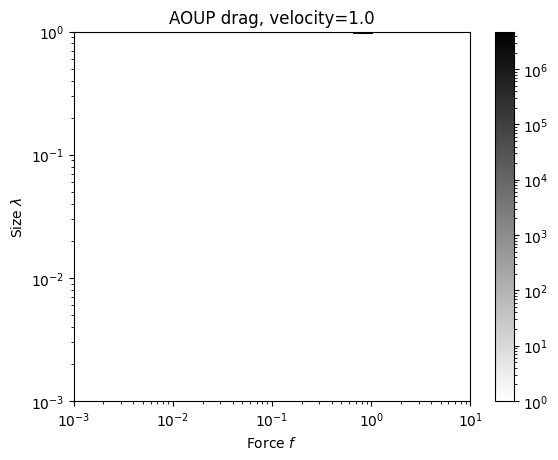

In [ ]:
fig, ax = plt.subplots()
velocity = 1.0

drag = get_drag_by_velocity(df, velocity=velocity)
print(np.log10(drag.max()), np.log10(-drag.min()))

cvals  = [1, drag.max()]
colors = ["white", "black"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

c = ax.pcolormesh(available_slope, available_Lambda, drag, shading="auto", 
                  norm=norm, cmap=cmap)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

ax.set_title(f"AOUP drag, velocity={velocity}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

cbar = plt.colorbar(c)
plt.show()

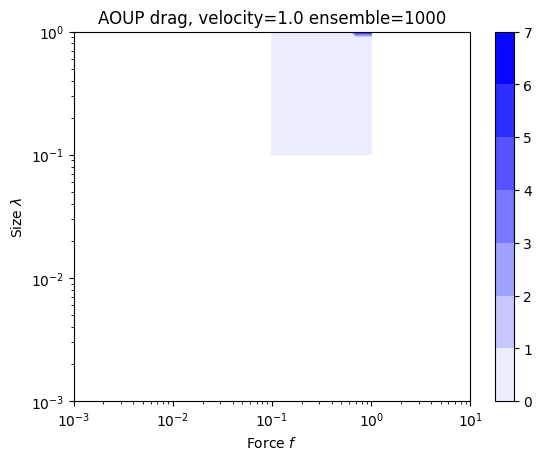

In [ ]:
fig, ax = plt.subplots()

data = get_log_scale(df, velocity=velocity)

cvals  = [data.min(), 0, data.max()]
colors = ["red","white","blue"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="linear")

c = ax.contourf(available_slope, available_Lambda, data, cmap=cmap, norm=norm)
# c = ax.pcolormesh(available_slope, available_Lambda, data, cmap=cmap, norm=norm)

ax.set_title(f"AOUP drag, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/AOUP drag, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()

/tmp/ipykernel_1737395/1737082942.py:4: RuntimeWarning: invalid value encountered in divide
  Z = drag / std


0.5


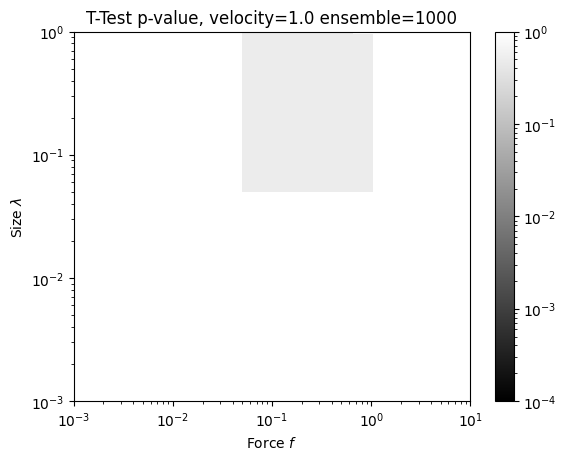

In [ ]:
drag = get_drag_by_velocity(df, velocity=velocity)
std = get_std_by_velocity(df, velocity=velocity)

Z = drag / std
Z[np.isnan(Z)] = 0.0

p_value = scipy.stats.norm.cdf(Z)
# print(p_value)
print(p_value.min())

fig, ax = plt.subplots()

cvals = [1.e-4, 1]
colors = ["black", "white"]
cmap, norm = get_colormap(cvals=cvals, colors=colors, mode="log")

# c = ax.contourf(available_slope, available_Lambda, p_value, shading='auto',
#                norm=norm, cmap=cmap)
c = ax.pcolormesh(available_slope, available_Lambda, p_value, shading='auto',
               norm=norm, cmap=cmap)

ax.set_title(f"T-Test p-value, velocity={velocity} ensemble={ensemble}")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([1.e-3, 1.e+1])
ax.set_ylim([1.e-3, 1])

cbar = plt.colorbar(c)
# plt.savefig(f"./fig/T-Test p-value, velocity={velocity}, ensemble={ensemble}.jpg")
plt.show()